# Feature Scaling

Feature scaling is a **data preprocessing technique** used to bring all numerical features (variables) into the same range or scale without distorting differences in the values.

Or you can simply say scaling adjusts the **values of features** so that they **have a comparable range or distribution**, especially when features are on **very different scales**. This helps machine learning models treat each feature more fairly during training.

Example:

`Age` ranges from 20–70

`Income` ranges from 20,000–100,000

If we feed them directly into some models, the larger-scale feature (`Income`) will dominate over the smaller-scale one (`Age`).


### Why Do We Use It?

1. Prevents domination of large-scale features

    * Models that rely on **distance** (KNN, K-means, PCA) or **gradient-based optimization** (Logistic/Linear Regression, Neural Networks) are heavily affected by the scale of features.

    * Scaling ensures all features contribute **fairly**.

2. Speeds up convergence

    * For gradient descent–based models, scaled data helps the algorithm converge faster (because the cost function doesn’t zigzag).

3. Improves interpretability

    * In models like regression, the coefficients become easier to compare when features are on the same scale.


### What If We Don’t Use It?

* **KNN / K-means / PCA** → Distances get biased toward large-scale features.

  Example: `Income` could dominate `Age`, even if `Age` is equally important.

* **Gradient Descent–based models** → Training becomes slower, sometimes failing to converge properly.

* **Regression models** → Coefficients become misleading, as features on larger scales appear artificially more important.

* **Tree-based models (Decision Trees, Random Forest, XGBoost)** → They don’t need scaling because they split based on thresholds, not distances.


### Types of Feature Scaling

* **Min-Max Scaling (Normalization)** → Scales values to `[0,1]`
$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

* **Standardization (Z-score Scaling)** → Scales values to mean = 0, std = 1
$$x' = \frac{x - \mu}{\sigma}$$

* **Robust Scaler (IQR Scaling)** I → Uses median and IQR (good for outliers).

    * Uses median and interquartile range, which makes it robust to outliers

    * Formula:
        $$x_{scaled} = \frac{x - median}{IQR}$$ 

    * Use when: Your data has outliers.

| Method          | Formula                                      | Use Case                                                     |
| --------------- | -------------------------------------------- | ------------------------------------------------------------ |
| Min-Max Scaling | $x' = \frac{x - x_{min}}{x_{max} - x_{min}}$ | When you need data in a fixed \[0,1] range                   |
| Standardization | $x' = \frac{x - \mu}{\sigma}$                | When you need mean=0, std=1 (works well with most ML models) |
| Robust Scaler   | $x' = \frac{x - median}{IQR}$                | When you have outliers                                       |

**Min-Max scaling can be sensitive to outliers** — so *Standardization or Robust Scaler is preferred when extreme values exist*.

And if in case you are wondering, if feature scaling makes you loose your data or it changes any pattern of your data then-NO, Feature scaling does NOT make you lose data, nor does it change the underlying pattern. 

### Feature Scaling Actually Does Not:

* Drop any rows or columns

* Remove information

* Change relationships between points

It’s like converting all distances from meters to kilometers — the numbers change, but the relative distances stay exactly the same.

---

### Effects on Outliers while using Different Scaling Technique

1. Standardization (Z-score Scaling)

    * Effect of Outliers:
        * Outliers do affect the mean (μ) and standard deviation (σ), so the entire distribution shifts and stretches.

    * What to Do:

        * If outliers are legitimate data points (e.g., very high but real house prices), you usually keep them — you just need to be aware that scaling will reduce how far they look from the mean.

        * If outliers are errors or noise, remove or cap them (e.g., using winsorization or z-score threshold filtering) before standardization.

2. Robust Scaling

    * Effect of Outliers:
        * Almost no effect — because median and IQR are not influenced by extreme values.

    * What to Do:

        * You don’t need to remove outliers just to make robust scaling work — that’s exactly what robust scaling is designed for.

        * You might still remove outliers if they are true anomalies that would distort your model, but not because of the scaling step.
     
---
     
#### Just to ignore all the effects you can just use a proper ML preprocessing pipeline.

* Removing outliers first makes your scaling more meaningful, because mean/median/min/max are no longer distorted.

* Scaling after outlier removal ensures all features are on a comparable scale, which helps most ML models train faster and perform better.

* Training on the scaled data is completely valid and usually improves convergence (especially for models using gradient descent).


### Why This Works So Well

* **Statistical estimates become stable** → mean, std, min, max, IQR are all representative of your data.

* **Scaling transforms are accurate** → no single extreme value dominates the transformation.

* **Model learns faster** → weights update more evenly across features.

* **No information loss (except bad outliers)** → your model still sees all relevant, legitimate data points.


##### So Your Final Pipeline Looks Like:

1. `Outlier Handling`

    * Detect and remove extreme/unwanted outliers (or cap them if necessary).

2. `Feature Scaling`

    * Apply Min-Max / Standardization / Robust depending on your model and data distribution.

3. `Model Training`

    * Train your algorithm on the cleaned & scaled dataset.
  
---

### When should you use IQR method or Z-Score to remove Outliers from you data:

1. **IQR Method (Interquartile Range)**

* How it works:

    * Finds the 25th percentile (Q1) and 75th percentile (Q3).

    * Computes IQR = Q3 - Q1.

    * Anything below **Q1 - 1.5×IQR** or above **Q3 + 1.5×IQR** is considered an outlier.

* Key Feature: Based on **median & percentiles** → very robust to extreme values.

* When to Use:
    * When your data is **not normally distributed** (skewed, long-tailed, etc.)
    * When you want a **non-parametric** method (no assumption about data distribution)
    * When you care about being robust to outliers themselves

2. Z-Score Method

* How it works:

    * Calculates mean (μ) and standard deviation (σ).

    * Computes Z = (X - μ) / σ.

    * Anything with |Z| > 3 (commonly) is considered an outlier.

* Key Feature: Based on **mean & standard deviation** → sensitive to extreme values.

* When to Use:
    * When your data is **approximately normal** (bell-shaped distribution)
    * When you want to measure **how many standard deviations away** a point is
    * When you prefer a probabilistic interpretation (Z > 3 ≈ rare event in normal distribution)

### Big Difference

* IQR works on ranks (position in sorted data) → robust, no assumption about shape

* Z-Score works on distances from mean → assumes data is roughly symmetric/normal

---

### Rule of Thumb (Quick Decision)


* Looks normal? → Use Z-Score

* Looks skewed? → Use IQR

* Not sure? → IQR is safer, since it doesn’t assume normality.


| Situation                                | Best Choice |
| ---------------------------------------- | ----------- |
| Data is symmetric & bell-shaped          | **Z-score** |
| Data is skewed or unknown distribution   | **IQR**     |
| Small dataset (mean & std unreliable)    | **IQR**     |
| Large dataset & want statistical meaning | **Z-score** |


### Example

Imagine this dataset:

`[10, 12, 13, 15, 14, 11, 100]`

* **Mean = 26.4, Std ≈ 31.3**

    * Z-score for 100 = (100 - 26.4)/31.3 ≈ 2.34 → ❌ Not flagged if cutoff = 3

* **IQR = Q3 - Q1 = 15 - 11.5 = 3.5**

    * Upper bound = 15 + 1.5×3.5 = 20.25 → ✅ 100 is flagged as outlier

So in this skewed dataset, IQR works better.

So let's get started and yes again it's gonna be the same loan_df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kagglehub
from kagglehub import KaggleDatasetAdapter
import urllib.request

# Setting the global font size for all plot elements (titles, labels, etc.)
plt.rcParams['font.size']=13
sns.set_style('darkgrid')


warnings.filterwarnings('ignore')    # This can be used for removing any future warnings
%matplotlib inline

The file`loan.csv` was taken from [here](https://www.kaggle.com/datasets/tanishaj225/loancsv)

In [2]:
# Set the path to the file you'd like to load
file_path = "loan.csv"  # file inside tanishaj225/loancsv dataset

# Load dataset into pandas DataFrame
loan_df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "tanishaj225/loancsv",   # dataset slug
    path=file_path           # specify file to load
)

In [3]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let's start again with the removing of the outliers with the help of `IQR` and filling up any **NaN** values using the 
KNNImputer and filling up the categorical or the object type with the help of **mode** and also fill up the invalid or the zero values in the required columns

In [4]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# First let's fill up the categorical once
cat = loan_df.select_dtypes(include='object').columns

In [7]:
cat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loan_df.shape

(614, 13)

In [9]:
for col in cat:
    loan_df[col].fillna(loan_df[col].mode()[0], inplace=True)

In [10]:
loan_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see the categorical data has been filled now it's time for the float type but if you remember correctly we should 
drop any column which has more than 50% of the data missing but if the column is important we should either look a way to fill it up or find another dataset

In [11]:
# Let's find the percentage of missing values in column Credit_History
missing_percentage = loan_df['Credit_History'].isna().mean() * 100
missing_percentage

np.float64(8.143322475570033)

Since the missing value in `Credit_History` is about 8.14% so we can either go with it or just drop it depending whether this feature is important on your model like:

* **Target variable** – What we are predicting (e.g., loan approval, default risk, interest rate).

* **Other features** – Whether we already have features like `PaymentHistory`, `Income`, or `DebtToIncomeRatio` that capture similar information about creditworthiness.

In [12]:
# Let's use KNNImputer to fill up the float64 dtype
from sklearn.impute import KNNImputer

In [13]:
flo = loan_df.select_dtypes(include='float64').columns

In [14]:
knn = KNNImputer(n_neighbors=5)
# Fit-transform and keep column names + index
loan_df[flo] = pd.DataFrame(knn.fit_transform(loan_df[flo]), columns=flo, index=loan_df.index)

In [15]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After filling missing values with KNN imputation, we still have `0` values in columns like `ApplicantIncome` and `CoapplicantIncome`.

Since a true income of `0` is unlikely and often represents missing data, we will replace these `0`s with `NaN` and re-impute them to maintain data consistency.

In [16]:
loan_df.ApplicantIncome.replace(0, np.nan, inplace=True)
loan_df.CoapplicantIncome.replace(0, np.nan, inplace=True)

In [17]:
loan_df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

After Analyzing CoapplicantIncome

We identified about 273 invalid values in the `CoapplicantIncome` column.

Next, let's calculate the percentage of missing values in this column to understand the extent of the issue.

In [18]:
missing_perc = loan_df.CoapplicantIncome.isna().mean() * 100
missing_perc

np.float64(44.462540716612374)

The missing values in `CoapplicantIncome` are just under 50%, which is still acceptable to work with.
Instead of dropping this column and losing valuable information, we will use **KNNImputer** to fill in the missing values based on the patterns in other features.

In [19]:
knn = KNNImputer(n_neighbors=5)
coapp_df = loan_df[['CoapplicantIncome']]

imputed = pd.DataFrame(knn.fit_transform(coapp_df), columns=['CoapplicantIncome'], index=loan_df.index)

In [20]:
# Assign back to original DataFrame
loan_df['CoapplicantIncome'] = imputed['CoapplicantIncome']

In [21]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,2919.193314,216.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2919.193314,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,2919.193314,141.0,360.0,1.0,Urban,Y


In [23]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2919.193314,146.820521,342.254072,0.844300
std,6109.041673,2540.709504,84.423462,64.469530,0.351726
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,2064.750000,100.250000,360.000000,1.000000
50%,3812.500000,2919.193314,128.000000,360.000000,1.000000
75%,5795.000000,2919.193314,169.050000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


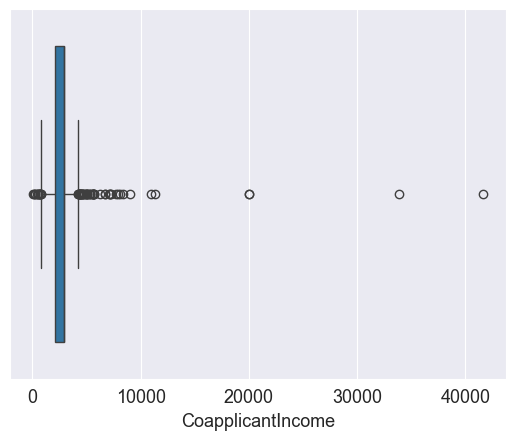

In [24]:
# Now let's look at the Outliers using the boxplot
sns.boxplot(data=loan_df,x='CoapplicantIncome')
plt.show()

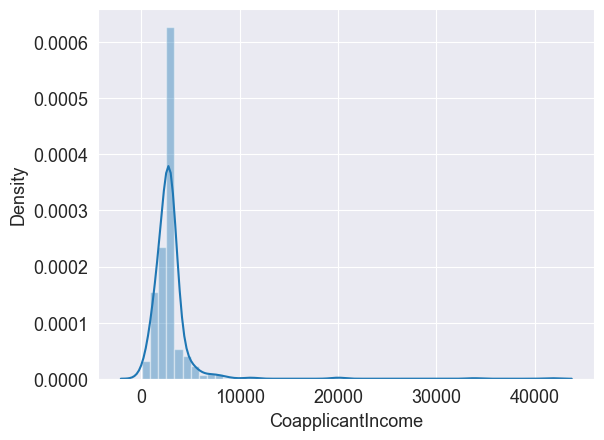

In [25]:
sns.distplot(loan_df.CoapplicantIncome)
plt.show()

In [26]:
# Let's remove the outliers using the IQR method
q1 = loan_df.CoapplicantIncome.quantile(0.25)
q3 = loan_df.CoapplicantIncome.quantile(0.75)

In [27]:
IQR = q3 - q1

In [28]:
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

In [29]:
lower_limit, upper_limit

(np.float64(783.0850293754843), np.float64(4200.858284374193))

Handling Outliers in `CoapplicantIncome`

The `CoapplicantIncome` column is **highly right-skewed**, with most values in the lower range but a few extreme high-income values.

Using the IQR method, these high values are flagged as potential outliers.

However, in real-world data, such high incomes are plausible, so we will retain them.

Any necessary transformations or scaling will be handled later during preprocessing.

Any necessary transformations or scaling to handle skewness can be applied later. For now, we will retain these extreme values. Once we learn about Robust Scaling and other preprocessing techniques, we can revisit this step if needed.

In [30]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,2919.193314,216.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2919.193314,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,2919.193314,141.0,360.0,1.0,Urban,Y


Well, since we have already handled the missing values and cleaned the dataset, 
we can now move on to **encoding categorical variables** and preparing the data for modeling.

`TL;DR`: Clean missing values → Encode categorical features → Scale numeric features → Ready for modeling.

1. **Handle missing and invalid values**

    * Filled NaNs using KNNImputer

    * Replaced invalid zeros in `CoapplicantIncome` with **NaN** and imputed

2. **Encode categorical variables**

    * Columns like `Gender`, `Married`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status` were OneHotEncoded

3. **Scale numeric features**

    * Applied StandardScaler to numeric columns (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`)

    * Did not scale the OneHotEncoded columns

4. **Ready for modeling**

    * Dataset now has clean, scaled numeric features and properly encoded categorical features